***Data Analysis Project for IMDB Dataset ***

In [154]:
#Importing required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display


df = pd.read_csv("E:\OneDrive\Desktop\MovieRatingsAnalysis\Data\imdb_top_1000.csv")
display(df.head(11))



,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


Step :2


Data Cleaning



In [155]:
# Check missing values
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


Data Cleaning : Column Cleaning and Handling Missing Values


       1. Runtime: Converting "142 min" → 142 (integer).

       2. Gross: Converting "$28,341,469" → 28341469 (float).

       3. Replacing missing gross value with 0

       4. Replacing missing value in Certificate with "NR" Means Not reported for Critical analysis

       5. Dropping rows of missing meta _score for critical analysis

In [156]:
# Clean "Runtime"
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '').astype(int)

# Clean "Gross"
df['Gross'] = df['Gross'].astype(str).str.replace(',', '').astype(float)
# Replace missing values in 'Gross' column with 0
df['Gross'] = df['Gross'].fillna(0)

# Handle other columns
df['Certificate'] = df['Certificate'].fillna('NR')
df.dropna(subset=['Meta_score'], inplace=True)

# Drop rows with missing 'Meta_score' (critical for analysis)
df.dropna(subset=['Meta_score'], inplace=True)

display(df.head(20))

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0


In [157]:
#Checking gross values missing values in the data 

df['Gross'].isnull().sum()

0

In [171]:
print(df[['Runtime', 'Gross']].dtypes)

Runtime      int32
Gross      float64
dtype: object


In [159]:
df['Genre'] = df['Genre'].str.split(' , ')

Step 4 :

EDA ANALYSIS of the Data :



In [172]:
df.describe()  # Summary for numeric columns

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Decade
count,842.000000,843.000000,843.000000,843.000000,8.430000e+02,8.430000e+02,842.000000
mean,1992.667458,122.368921,7.931673,77.971530,3.131871e+05,6.668334e+07,1988.040380
std,21.638663,27.042332,0.283732,12.376099,3.417988e+05,1.094383e+08,21.547355
min,1925.000000,64.000000,7.600000,28.000000,2.519800e+04,0.000000e+00,1920.000000
25%,1980.000000,103.000000,7.700000,70.000000,7.102350e+04,2.080328e+06,1980.000000
50%,1999.000000,119.000000,7.900000,79.000000,1.849660e+05,2.249449e+07,1990.000000
75%,2009.000000,135.000000,8.100000,87.000000,4.396310e+05,7.833398e+07,2000.000000
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08,2020.000000


Top 3 Director with the Most Rating:

     1. Alfred Hichcock
     2. Steven Spielberg
     3. Hayao Miyazaki

In [173]:
top_directors = df['Director'].value_counts().head(10)
print(top_directors)

Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Stanley Kubrick       9
Christopher Nolan     8
Quentin Tarantino     8
David Fincher         8
Woody Allen           8
Clint Eastwood        8
Name: count, dtype: int64


Top 3 Genre which is popular ?

      1. Drama

      2. Comedy

      3. Adventure

In [162]:
genres = df.explode('Genre')['Genre'].value_counts()
print(genres)  # What are the most common genres?

Genre
Drama        600
Comedy       188
Adventure    180
Crime        169
Action       156
Thriller     118
Romance      104
Biography     97
Mystery       80
Animation     75
Sci-Fi        62
Fantasy       58
Family        50
History       48
War           45
Music         29
Horror        27
Western       20
Sport         17
Musical       12
Film-Noir     11
Name: count, dtype: int64


In [163]:
# Convert Released_Year to integers first
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')


In [164]:

# Now create the decade column
df['Decade'] = (df['Released_Year'] // 10) * 10
decade_ratings = df.groupby('Decade')['IMDB_Rating'].mean()


Step 5:

   Data Visualization:
        

C:\Users\Naveen\AppData\Local\Temp\ipykernel_37068\2953902187.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




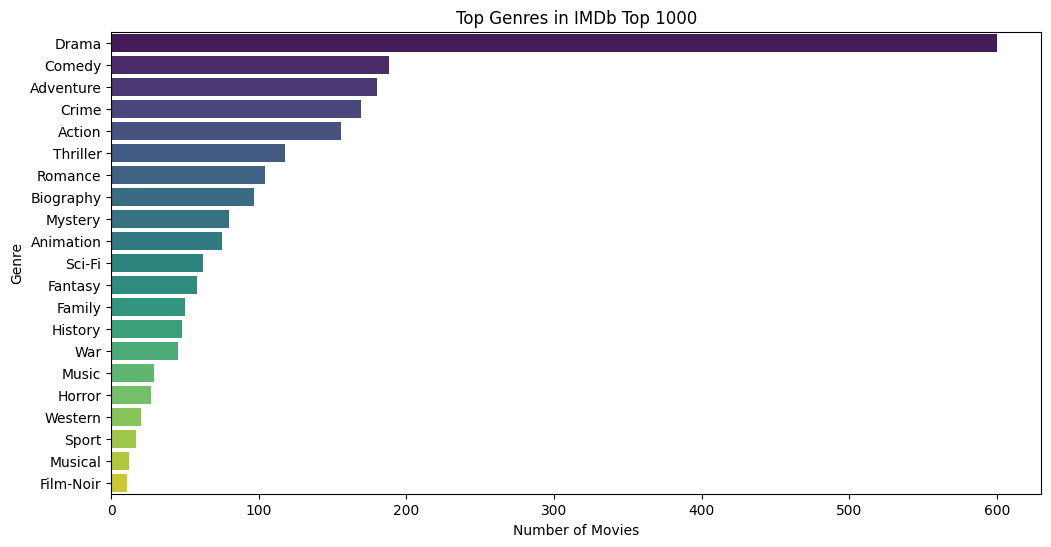

In [165]:
plt.figure(figsize=(12,6))
sns.barplot(x=genres.values, y=genres.index, palette='viridis')
plt.title('Top Genres in IMDb Top 1000')
plt.xlabel('Number of Movies')
plt.show()

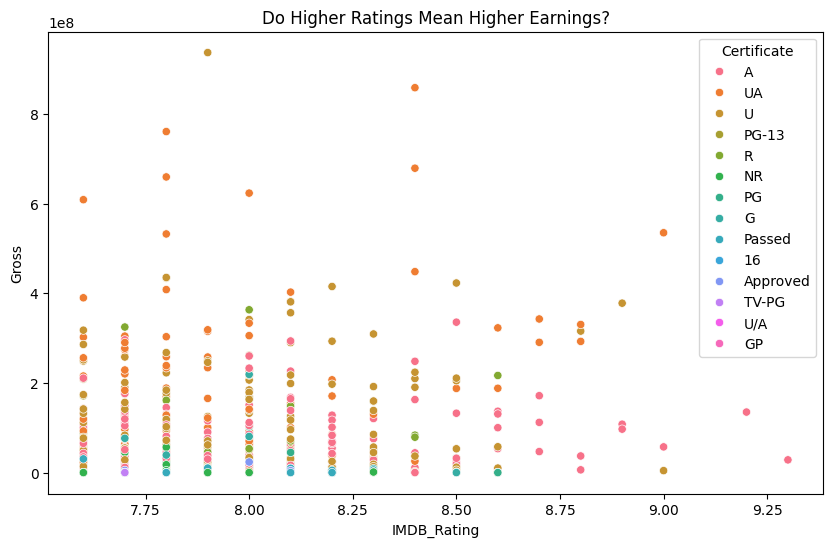

In [166]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df, hue='Certificate')
plt.title('Do Higher Ratings Mean Higher Earnings?')
plt.show()

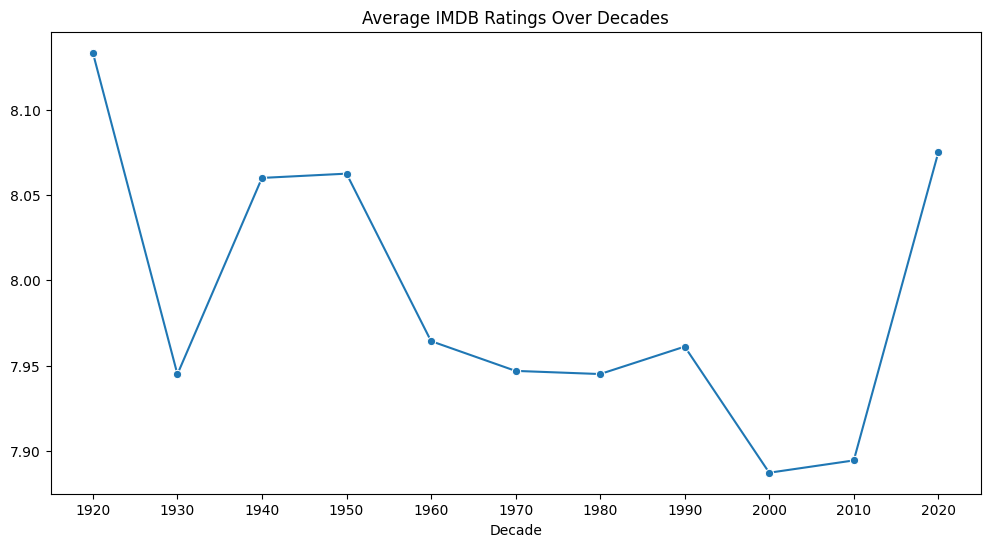

In [167]:
plt.figure(figsize=(12,6))
sns.lineplot(x=decade_ratings.index, y=decade_ratings.values, marker='o')
plt.title('Average IMDB Ratings Over Decades')
plt.xticks(decade_ratings.index)  # Shows all decades
plt.show()

STEP : 6 

Advanced Analysis 

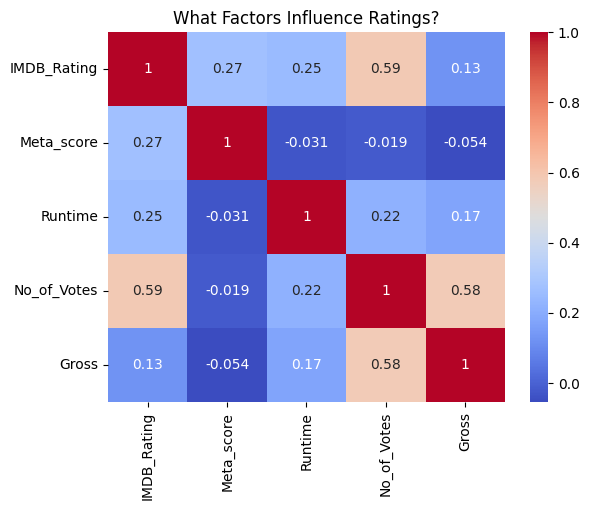

In [168]:
numeric_cols = ['IMDB_Rating', 'Meta_score', 'Runtime', 'No_of_Votes', 'Gross']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('What Factors Influence Ratings?')
plt.show()

In [169]:
morgan_freeman_movies = df[df['Star1'].str.contains('Morgan Freeman') | 
                         df['Star2'].str.contains('Morgan Freeman')]
print(morgan_freeman_movies['IMDB_Rating'].mean())

8.5


In [170]:

fig = px.scatter(df, x='IMDB_Rating', y='Gross', color='Certificate', hover_data=['Series_Title'])
fig.show()